In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
#Download csv file
NPP_file = pd.read_csv('Ecosystem_NPP.csv')

In [3]:
#Print csv file name
NPP_file

,Site,Vegetation,MeanNPPobs_gCm−2yr−1,Precipitation_cm,MAT_C,Carbon Nitrogen Ratio
0,Mid-west Agricultrual,Corn,839,99,11.23,10
1,Mid-west Agricultrual,Soybean,379,99,11.23,11
2,Temperate Forest,Deciduous Forest,679,111,8.31,24
3,Temperate Forest,Conifer Forest,552,111,8.31,37
4,Temperate Conifer,Conifer Forest,356,44,7.75,40
5,Boreal Forest,Upland Black Spruce,251,52,-3.20,60
6,Boreal Forest,Open Black Spruce,181,52,-3.20,50
7,Arctic Plain,Grassland,64,5,-10.91,25
8,Desert grassland,Grassland,54,35,13.57,24


NPP and C:N LinregressResult(slope=-0.024023666773747076, intercept=40.17771133621349, rvalue=-0.38601095799977414, pvalue=0.30484005454690416, stderr=0.021699727683955974, intercept_stderr=9.819155416859005)


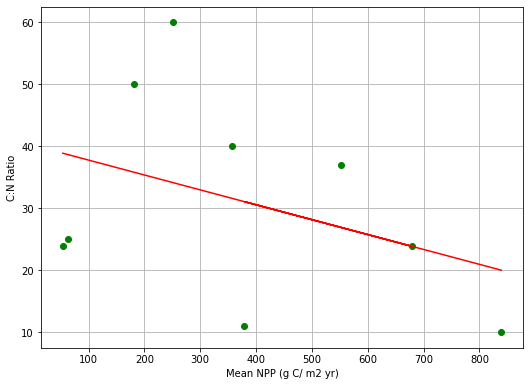

In [4]:
#Part 1 Figure
# Creating individual plots comparing NPP to C:N, and MAT_C to see linear relationships 
#NPP and C:N
plt.figure(figsize=(8,6))

x = NPP_file['MeanNPPobs_gCm−2yr−1']
y = NPP_file['Carbon Nitrogen Ratio']
plt.plot(x, y, 'go')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color='r', linestyle='solid')

from scipy.stats import linregress
x = NPP_file['MeanNPPobs_gCm−2yr−1']
y = NPP_file['Carbon Nitrogen Ratio']
res = stats.linregress(x, y)
print('NPP and C:N',res)
plt.ylabel('C:N Ratio')
plt.xlabel('Mean NPP (g C/ m2 yr)')
plt.grid()
plt.tight_layout(pad=3)
plt.savefig('NPP vs Cto N.png')
plt.show()

NPP and MAT LinregressResult(slope=0.015631062678071232, intercept=-1.039135031658775, rvalue=0.5048072794802313, pvalue=0.16573817777335279, stderr=0.010102792733765485, intercept_stderr=4.57152704595933)


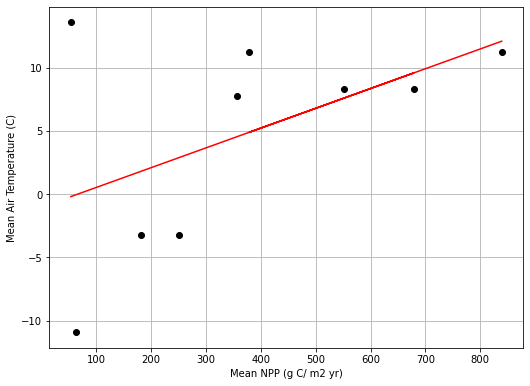

In [5]:
#Part 1 Figure
#Creating individual linear regression plots comparing NPP to and MAT_C 
#NPP and MAT_C
plt.figure(figsize=(8,6))

x = NPP_file['MeanNPPobs_gCm−2yr−1']
y = NPP_file['MAT_C']
plt.plot(x, y, 'ko')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)


#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color='r', linestyle='solid')

#create a linear regression trend
from scipy.stats import linregress
x = NPP_file['MeanNPPobs_gCm−2yr−1']
y = NPP_file['MAT_C']
res = stats.linregress(x, y)
print('NPP and MAT',res)

plt.ylabel('Mean Air Temperature (C)')
plt.xlabel('Mean NPP (g C/ m2 yr)')
plt.tight_layout(pad=3)
plt.grid()
plt.savefig('NPP vs MAT.png')
plt.show()

Precipitation and NPP LinregressResult(slope=0.11975412284625751, intercept=22.913879761200675, rvalue=0.8496182540726184, pvalue=0.003736416927652011, stderr=0.02809675937651325, intercept_stderr=12.71382070071114)


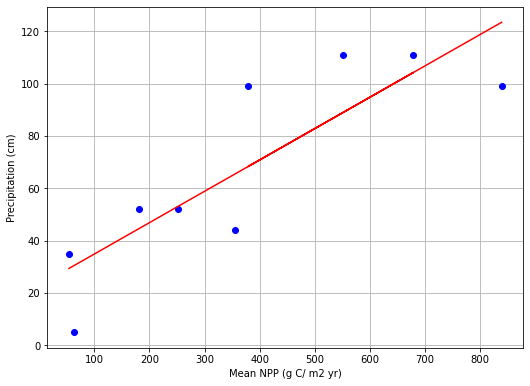

In [6]:
#Part 1 Figure
#Creating individual linear regression plots comparing NPP to Precipitation
#NPP and Precipitaion
plt.figure(figsize=(8,6))

x = NPP_file['MeanNPPobs_gCm−2yr−1']
y = NPP_file['Precipitation_cm']
plt.plot(x, y, 'bo')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color='r', linestyle='solid')

from scipy.stats import linregress
x = NPP_file['MeanNPPobs_gCm−2yr−1']
y = NPP_file['Precipitation_cm']
res = stats.linregress(x, y)
print('Precipitation and NPP',res)
plt.ylabel('Precipitation (cm)')
plt.xlabel('Mean NPP (g C/ m2 yr)')
plt.grid()
plt.tight_layout(pad=3)
plt.savefig('NPP vs Precip.png')
plt.show()

In [9]:
#Part 1 Statistical Analysis - Multiple Linear Regression 

#These are the independent variables
x = NPP_file[['Precipitation_cm', 'MAT_C', 'Carbon Nitrogen Ratio']] 
#This is the dependent variable
y = NPP_file['MeanNPPobs_gCm−2yr−1'] 
#Modeling the linear regression
regr = linear_model.LinearRegression() 
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#Add constant
x = sm.add_constant(x) 

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

#print the multiple linear regression output
print_model = model.summary()

import warnings
warnings.filterwarnings("ignore")

print(print_model)

Intercept: 
 56.75674555811315
Coefficients: 
 [ 6.13111538 -3.53605254 -2.60199415]
                             OLS Regression Results                             
Dep. Variable:     MeanNPPobs_gCm−2yr−1   R-squared:                       0.741
Model:                              OLS   Adj. R-squared:                  0.586
Method:                   Least Squares   F-statistic:                     4.780
Date:                  Wed, 04 Oct 2023   Prob (F-statistic):             0.0625
Time:                          13:11:50   Log-Likelihood:                -56.608
No. Observations:                     9   AIC:                             121.2
Df Residuals:                         5   BIC:                             122.0
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [10]:
#Part 2 Calculation
#NPP and Precipitation have the highest r2 value of 0.8496

#Additional Information
#linear regression: y=m*x+b
#Area = 400 km
#1 Tg = 10**12 g
#1 km2 = 10**6 m2
#time = 10 years
#Mean Annual Precip = 65

m = 0.1198 #slope
b = 22.9139 # intercept
x = 65
y = m*x + b

NPP_Tg = (y*(10**6)*400*10)/(10**12)
display(NPP_Tg)

0.1228036